In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv('./datasets/Dataset01-CoffeeAndCode/CoffeeAndCode.csv')
df.head()

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2,Before coding,Yes,Americano,Yes,Female,Lebanon,30 to 39
2,5,3,While coding,No,Nescafe,Yes,Female,Lebanon,18 to 29
3,8,2,Before coding,No,Nescafe,Yes,Male,Lebanon,NaN
4,10,3,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29


In [76]:
df.shape

(100, 9)

In [77]:
df.nunique()

CodingHours            10
CoffeeCupsPerDay        8
CoffeeTime              7
CodingWithoutCoffee     3
CoffeeType              8
CoffeeSolveBugs         3
Gender                  2
Country                 1
AgeRange                5
dtype: int64

## Gender

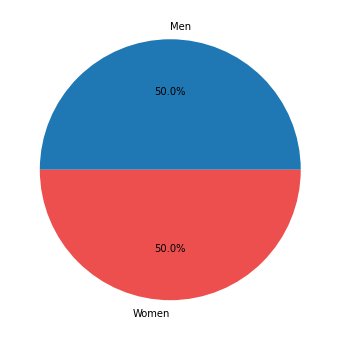

In [78]:
mens = df['Gender'].shape[0]
womens = df['Gender'].shape[0]
plt.figure(figsize=(18,6))
plt.pie([mens,womens],labels=['Men','Women'],autopct='%1.1f%%',colors=['#1F77B4','#ed4e4e']);

## Ages

In [79]:
df['AgeRange'].dropna( axis = 'index', inplace=True )
AgeRanges = df.groupby('AgeRange')
AgeRangesCount = AgeRanges.size()
AgeRangesCount

AgeRange
18 to 29    60
30 to 39    29
40 to 49     6
50 to 59     1
Under 18     2
dtype: int64

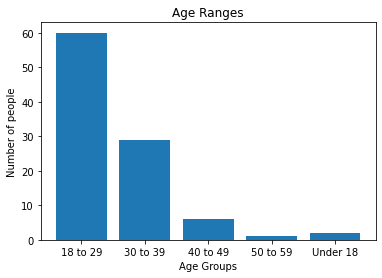

In [80]:
# AgeRangesCount.plot.bar(title='Age Ranges', color='#4287f5');
# plt.xlabel('Age Groups'); 
# plt.ylabel('Number of people')


x= df.groupby('AgeRange').groups.keys()
y= df.groupby('AgeRange')['AgeRange'].count()
fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_title("Age Ranges")
ax.set_xlabel("Age Groups")
ax.set_ylabel("Number of people")
plt.show()


## coding hours

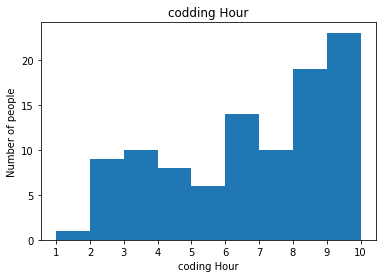

In [81]:
bins = [1,2,3,4,5,6,7,8,9,10]
fig, ax = plt.subplots()
ax.hist(df['CodingHours'],bins=bins)
ax.set_xticks(bins)
ax.set_title("codding Hour")
ax.set_xlabel("coding Hour")
ax.set_ylabel("Number of people")
plt.show()

## Coffee Cups Per Day

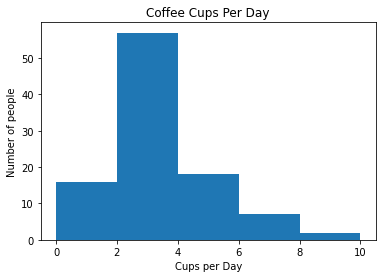

In [82]:
bins = [0,2,4,6,8,10]
fig, ax = plt.subplots()
ax.hist(df['CoffeeCupsPerDay'],bins=bins)
ax.set_xticks(bins)
ax.set_title("Coffee Cups Per Day")
ax.set_xlabel("Cups per Day")
ax.set_ylabel("Number of people")
plt.show()

## coding hours and Coffee Cups Per Day

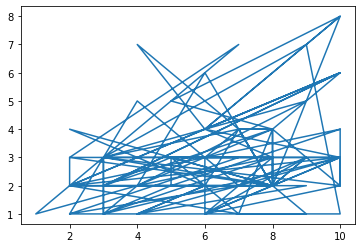

In [83]:
fig, ax = plt.subplots()
ax.plot(df['CodingHours'],df['CoffeeCupsPerDay'])

## Coding Without Coffee

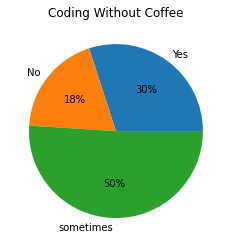

In [84]:
yes = df.loc[df['CodingWithoutCoffee']=='Yes'].count()[0]
no = df.loc[df['CodingWithoutCoffee']=='No'].count()[0]
sometimes = df.loc[df['CodingWithoutCoffee']=='Sometimes'].count()[0]
fig, ax = plt.subplots()
ax.pie([yes, no, sometimes], labels=['Yes', 'No', 'sometimes'], autopct='%1d%%')
ax.set_title("Coding Without Coffee")
plt.show()

## Coffee Time

In [85]:

CoffeeTime = df.groupby('CoffeeTime')
CoffeeTimeCount = CoffeeTime.size()
CoffeeTimeCount

CoffeeTime
After coding                2
All the time                4
Before and while coding     4
Before coding              25
In the morning              3
No specific time            1
While coding               61
dtype: int64

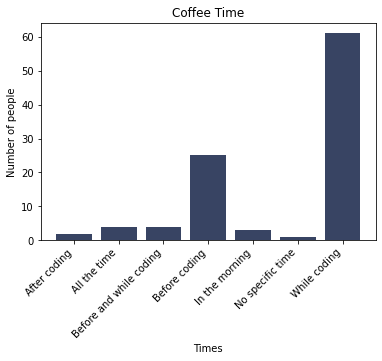

In [86]:
x= df.groupby('CoffeeTime').groups.keys()
y= df.groupby('CoffeeTime')['CoffeeTime'].count()

fig, ax = plt.subplots()
ax.bar(x,y, color="#384463")
ax.set_title("Coffee Time")
ax.set_xlabel("Times")
ax.set_ylabel("Number of people")
plt.xticks(rotation=45, ha='right')
plt.show()

## Coffee Solve Bugs

In [87]:
df['CoffeeSolveBugs'].unique()

array(['Sometimes', 'Yes', 'No'], dtype=object)

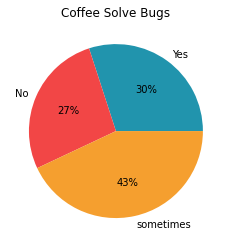

In [88]:
yes = df.loc[df['CoffeeSolveBugs']=='Yes'].count()[0]
no = df.loc[df['CoffeeSolveBugs']=='No'].count()[0]
sometimes = df.loc[df['CoffeeSolveBugs']=='Sometimes'].count()[0]
fig, ax = plt.subplots()
ax.pie([yes, no, sometimes], labels=['Yes', 'No', 'sometimes'], autopct='%1d%%', colors=['#2194ad','#f24646','#f59f2f'])
ax.set_title('Coffee Solve Bugs')
plt.show()

## Coffee Type

In [89]:
CoffeeType = df.groupby('CoffeeType')
CoffeeTypeCount = CoffeeType.size()
CoffeeTypeCount

CoffeeType
American Coffee             23
Americano                    2
Caffè latte                  5
Cappuccino                   7
Double Espresso (Doppio)     3
Espresso (Short Black)       8
Nescafe                     32
Turkish                     19
dtype: int64

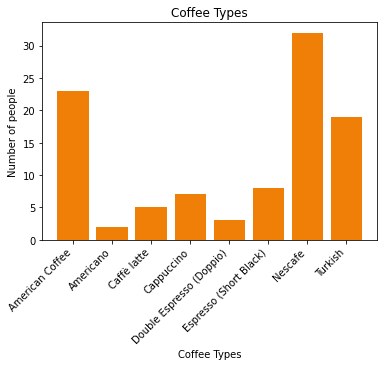

In [90]:
x= df.groupby('CoffeeType').groups.keys()
y= df.groupby('CoffeeType')['CoffeeType'].count()

fig, ax = plt.subplots()
ax.bar(x,y, color="#f07f07")
ax.set_title("Coffee Types")
ax.set_xlabel("Coffee Types")
ax.set_ylabel("Number of people")
plt.xticks(rotation=45, ha='right')
plt.show()